In [2]:
# IMPORTS ET CONFIGURATION
# ============================================


import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import os
from datetime import datetime


print("✅ Bibliothèques importées")
print(f"📅 Date : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


# ==============================================================================
# CONFIGURATION PLOTLY
# ==============================================================================


# Thème sombre
pio.templates.default = "plotly_dark"


# Palette de couleurs cohérente avec le site
COLOR_SCALE = [
   '#E50914',  # Rouge cinéma
   '#D4AF37',  # Or
   '#00C853',  # Vert
   '#1E88E5',  # Bleu
   '#9C27B0',  # Violet
]


# Configuration globale des graphiques (boutons, export, etc.)
config = {
   'displayModeBar': True,
   'displaylogo': False,
   'modeBarButtonsToRemove': ['lasso2d', 'select2d'],
   'toImageButtonOptions': {
       'format': 'png',
       'filename': 'movie_analysis',
       'height': 1080,
       'width': 1920,
       'scale': 2
   }
}


print("✅ Plotly configuré en mode dark")


# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================


df = pd.read_csv('../data/processed/movies_clean.csv')


# Créer le dossier outputs si nécessaire
os.makedirs('../outputs/figures', exist_ok=True)


print(f"\n📊 Dataset chargé : {len(df):,} films")
print(f"📅 Période : {int(df['release_year'].min())} - {int(df['release_year'].max())}")
print(f"💰 Montants ajustés inflation 2024")
print(f"\n✅ Prêt pour créer 3 visualisations interactives !")


✅ Bibliothèques importées
📅 Date : 2026-01-21 13:35:09
✅ Plotly configuré en mode dark

📊 Dataset chargé : 7,632 films
📅 Période : 1980 - 2023
💰 Montants ajustés inflation 2024

✅ Prêt pour créer 3 visualisations interactives !


In [4]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

print("\n" + "="*80)
print("GRAPHIQUE : SCATTER BUDGET VS REVENUE (SYNTHÈSE INTERACTIVE)")
print("="*80)

# 1. Préparation et Nettoyage
df_scatter = df.copy()

# Filtrage strict pour l'échelle logarithmique (valeurs > 0 obligatoires)
df_scatter = df_scatter[(df_scatter['budget_million'] > 0) & (df_scatter['revenue_million'] > 0)].copy()

# Regroupement des genres mineurs pour la clarté de la légende (Top 10 + Autres)
top_genres = df_scatter['main_genre'].value_counts().nlargest(10).index
df_scatter['genre_groupe'] = df_scatter['main_genre'].apply(lambda x: x if x in top_genres else 'Autres')

# 2. Configuration des visuels
# Ajustement de la taille des bulles (Popularité)
df_scatter['bubble_size'] = df_scatter['popularity'].clip(0, 500) # Clip pour éviter des bulles géantes

# Texte au survol (Tooltips)
df_scatter['hover_text'] = (
    '<b>' + df_scatter['title'] + '</b><br>' +
    '📅 Année : ' + df_scatter['release_year'].astype(str) + '<br>' +
    '🎭 Genre : ' + df_scatter['main_genre'] + '<br>' +
    '💰 Budget : ' + df_scatter['budget_million'].map('{:.1f}M$'.format) + '<br>' +
    '💵 Revenu : ' + df_scatter['revenue_million'].map('{:.1f}M$'.format) + '<br>' +
    '📈 ROI : ' + df_scatter['roi'].map('{:.2f}'.format) + '<br>' +
    '⭐ Note : ' + df_scatter['vote_average'].astype(str) + '/10'
)

# 3. Création du Graphique
fig1 = px.scatter(
    df_scatter,
    x='budget_million',
    y='revenue_million',
    color='genre_groupe',
    size='bubble_size',
    custom_data=['hover_text'],
    title='<b>Budget vs Revenue : La Géographie du Risque</b><br><sup>Taille = Popularité | Échelle Log | Ligne Verte = Seuil de Profit Réel (2.5x)</sup>',
    labels={'budget_million': 'Budget (M$)', 'revenue_million': 'Revenue (M$)', 'genre_groupe': 'Genre'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    opacity=0.4, # Opacité réduite pour voir la densité des points
    height=850
)

# Mise à jour du hover
fig1.update_traces(hovertemplate='%{customdata[0]}<extra></extra>')

# 4. Ajout des Lignes de Référence (Rentabilité)
max_val = max(df_scatter['budget_million'].max(), df_scatter['revenue_million'].max()) * 2
line_range = np.array([0.1, max_val])

# Ligne de Break-even Technique (Revenue = Budget)
fig1.add_trace(go.Scatter(
    x=line_range, y=line_range,
    mode='lines', name='Break-even (1x)',
    line=dict(color='white', width=1, dash='dot'),
    opacity=0.5
))

# Ligne de Rentabilité Réelle (Revenue = 2.5 * Budget)
fig1.add_trace(go.Scatter(
    x=line_range, y=line_range * 2.5,
    mode='lines', name='Profit Réel (2.5x)',
    line=dict(color='#00FF41', width=3), # Vert fluo
    hovertemplate='Success Zone : Revenu > 2.5x Budget<extra></extra>'
))

# 5. Configuration des Axes Logarithmiques
tickvals = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
ticktext = ['0.1M', '0.5M', '1M', '5M', '10M', '50M', '100M', '500M', '1B']

fig1.update_layout(
    template='plotly_dark',
    plot_bgcolor='#1a1a1a',
    paper_bgcolor='#141414',
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis=dict(
        type="log", tickmode='array', tickvals=tickvals, ticktext=ticktext,
        gridcolor='rgba(255,255,255,0.05)', zeroline=False, title_font=dict(size=14)
    ),
    yaxis=dict(
        type="log", tickmode='array', tickvals=tickvals, ticktext=ticktext,
        gridcolor='rgba(255,255,255,0.05)', zeroline=False, title_font=dict(size=14)
    ),
    legend=dict(
        title="Genres Principaux",
        bgcolor='rgba(0,0,0,0.5)',
        bordercolor='gray',
        borderwidth=1,
        yanchor="top", y=0.99, xanchor="left", x=0.01
    )
)

# Affichage et Sauvegarde
fig1.show()
fig1.write_html('../outputs/figures/synthèse_interactive_budget_revenue.html')

print(f"✅ Analyse terminée sur {len(df_scatter):,} films.")
print(f"💾 Graphique sauvegardé sous : synthèse_interactive_budget_revenue.html")


GRAPHIQUE : SCATTER BUDGET VS REVENUE (SYNTHÈSE INTERACTIVE)


✅ Analyse terminée sur 7,632 films.
💾 Graphique sauvegardé sous : synthèse_interactive_budget_revenue.html


✅ Colonne genre utilisée : main_genre
✅ Genres analysés : 18
💰 Revenus totaux : 890,355 M$


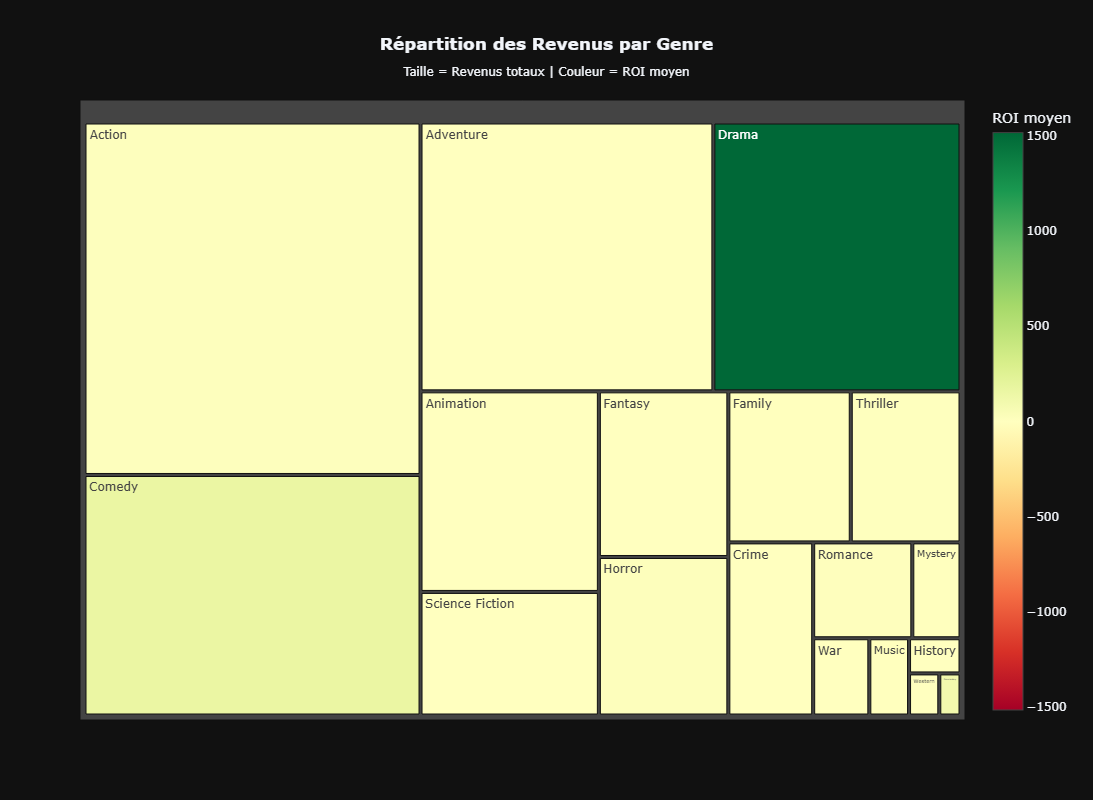

In [6]:
import json
import numpy as np
import plotly.graph_objects as go
import os

# -----------------------------
# Détection de la colonne genre
# -----------------------------
if 'genre' in df.columns:
    genre_col = 'genre'
elif 'main_genre' in df.columns:
    genre_col = 'main_genre'
elif 'primary_genre' in df.columns:
    genre_col = 'primary_genre'
elif 'genres' in df.columns:
    genre_col = 'genres'
else:
    raise ValueError(" Aucune colonne de genre trouvée")

print(f"✅ Colonne genre utilisée : {genre_col}")

# -----------------------------
# Extraction du genre principal
# -----------------------------
def extract_main_genre(value):
    if pd.isna(value) or value == '':
        return 'Unknown'
    if genre_col == 'genres':
        try:
            genres_list = json.loads(value)
            if len(genres_list) > 0:
                return genres_list[0]['name']
            else:
                return 'Unknown'
        except:
            return 'Unknown'
    else:
        return value

df['main_genre'] = df[genre_col].apply(extract_main_genre)

# -----------------------------
# Agrégation par genre
# -----------------------------
genre_stats = df.groupby('main_genre').agg({
    'revenue_million': 'sum',
    'roi': 'mean',
    'title': 'count'
}).reset_index()

genre_stats.columns = [
    'genre',
    'total_revenue',
    'avg_roi',
    'film_count'
]

# Filtrage
genre_stats = genre_stats[genre_stats['film_count'] >= 20]
genre_stats = genre_stats.sort_values('total_revenue', ascending=False)

print(f"✅ Genres analysés : {len(genre_stats)}")
print(f"💰 Revenus totaux : {genre_stats['total_revenue'].sum():,.0f} M$")

# -----------------------------
# Treemap
# -----------------------------
fig = go.Figure(go.Treemap(
    labels=genre_stats['genre'],
    parents=[''] * len(genre_stats),
    values=genre_stats['total_revenue'],

    marker=dict(
        colors=genre_stats['avg_roi'],
        colorscale='RdYlGn',
        cmid=0,
        colorbar=dict(title='ROI moyen')
    ),

    customdata=np.column_stack((
        genre_stats['film_count'],
        genre_stats['avg_roi'].round(2),
        genre_stats['total_revenue'].round(0)
    )),

    hovertemplate=(
        '<b>%{label}</b><br><br>'
        '💰 Revenu total : $%{customdata[2]:,.0f} M<br>'
        '🎬 Films : %{customdata[0]}<br>'
        '📈 ROI moyen : %{customdata[1]}<br>'
        '<extra></extra>'
    )
))

fig.update_layout(
    title={
        'text': (
            '<b>Répartition des Revenus par Genre</b><br>'
            '<sub>Taille = Revenus totaux | Couleur = ROI moyen</sub>'
        ),
        'x': 0.5
    },
    template='plotly_dark',
    height=800
)

fig.show(config=config)
